(<matplotlib.image.AxesImage at 0x20bebcdae10>,
 <matplotlib.colorbar.Colorbar at 0x20bec038690>)

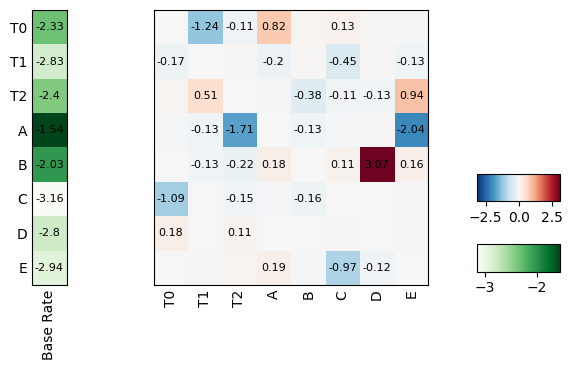

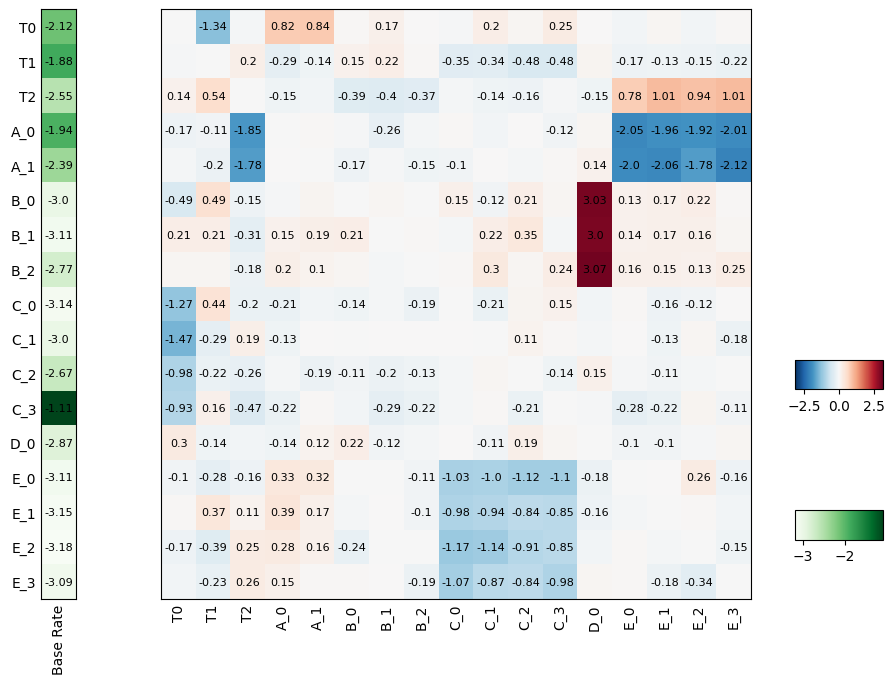

In [15]:
import sys

sys.path.append("..")


import mhn
import ClusterableMhnGenerator as cmg
import matplotlib.pyplot as plt
import numpy as np

generator = cmg.ClusterableMhnGenerator(3,5)
generator.randomizeBaseRates()
generator.getMHN().log_theta[4,6]=3
generator.getMHN().log_theta[3,7]=-2
generator.getMHN().log_theta[2,4]=-0.3
generator.getMHN().log_theta[7,5]=-0.9
generator.getMHN().log_theta[0,1]=-1.2
generator.getMHN().log_theta[2,1]=0.4
generator.getMHN().log_theta[3,2]=-1.8
generator.getMHN().log_theta[1,5]=-0.5
generator.getMHN().log_theta[2,7]=0.8
generator.getMHN().log_theta[0,3]=0.8
generator.getMHN().log_theta[5,0]=-1.0





generator.addNoiseOffDiags(0.1)

generator.getMHN().plot()
generator.splitClusters([2,3,4,1,4]).randomizeBaseRates().addNoiseOffDiags(0.1,generator.CMG_Domain.TOTAL)
generator.addNoiseOffDiags(0.2, generator.CMG_Domain.CLUSTER, generator.CMG_Domain.TEST)

ground_truth_mhn = generator.getMHN()
ground_truth_mhn.plot()

In [16]:
sampled_data=ground_truth_mhn.sample_artificial_data(100000, as_dataframe=True)

#compute distances based on the distances of redcued MHNs including the test events T1,..,TN
test_events= generator.events[generator.CMG_Step.SPLIT][generator.CMG_Domain.TEST]
print(sampled_data)


       T0  T1  T2  A_0  A_1  B_0  B_1  B_2  C_0  C_1  C_2  C_3  D_0  E_0  E_1  \
0       0   0   1    1    0    0    0    0    0    0    1    0    0    0    0   
1       1   0   0    0    1    0    0    0    0    0    0    1    0    0    0   
2       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
3       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
4       0   0   0    0    0    0    0    0    1    0    0    1    0    0    0   
...    ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995   0   1   0    0    0    0    0    1    0    0    0    0    0    0    0   
99996   0   0   0    1    0    0    0    0    0    0    0    0    0    0    0   
99997   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99998   0   1   0    0    0    0    0    0    0    0    1    0    1    0    0   
99999   0   1   0    0    0    0    0    0    0    1    0    0    0    0    0   

       E_2  E_3  
0        